In [40]:
from matplotlib.pyplot import   subplots
from numpy import zeros, sqrt, arange, cumsum, exp, repeat, tile, mean
from numpy.random import randn as N, seed

The Wiener process $W_t$ is a random process over $[0,T]$, i.e. a random variable indexed by a continuous index $t \in [0,T]$ that satisfies three conditions:

1. $W_t=0$. 
2. For $0 \leq s < t \leq T$ the random variable $W_t - W_s \sim \operatorname{N}(0, t-s)$.
3. $0 \leq s < t < u <v \leq T$ the random variables $W_t - W_s$, $W_v - W_u$ are independent.

We sample $W_t$ discretely, i.e. at times $t_j = j\cdot \delta t$ where $\delta t = T/N$ for some $N$. Conditions (2) and (3) imply that 
\begin{equation}
    W_j = W_{j-1} + \operatorname{d}W_j
\end{equation}
where $\operatorname{d}W_j \sim \sqrt{\delta t}\operatorname{N}(0,1)$.

In [26]:
T, n = 1, 500
δt = T/n
dW = zeros(n)
W = zeros(n)

seed(1)
dW[0] = sqrt(δt)*N()
W[1] = W[0] + dW[0]
for j in range(2, n):
    dW[j] = sqrt(δt)*N()
    W[j] = W[j-1] + dW[j]

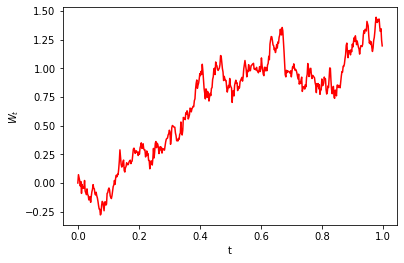

In [27]:
ts = arange(0, T, δt)
fig, ax = subplots()
ax.plot(ts, W, "r-")
ax.set_xlabel("t");
ax.set_ylabel("$W_t$");

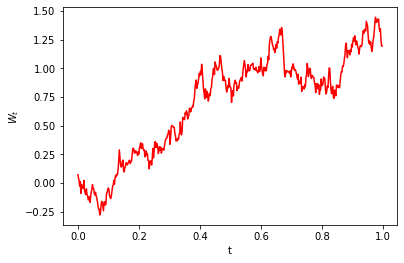

In [28]:
seed(1)
dW = sqrt(δt)*N(n)
W = cumsum(dW)
ax.clear()
ax.plot(ts, W, "r-")
ax.set_xlabel("t");
ax.set_ylabel("$W_t$");
fig

$u(W_t) = \exp\left(t + \frac{1}{2} W_t\right)$

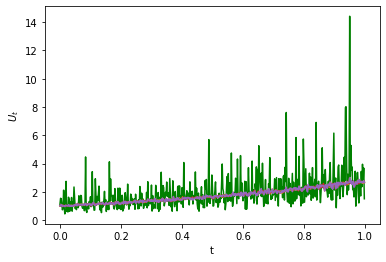

In [46]:
n_paths = 1000
dW = sqrt(δt)*N(n_paths,n)
W = cumsum(dW, axis=0)
U = exp(tile(ts, (n_paths,1)) + 0.5*W)
u = mean(U, axis=0)
ax.clear()
ax.plot(ts, u, "g")
for i in range(5):
    ax.plot(ts, U[i])
ax.set_xlabel("t");
ax.set_ylabel("$U_t$");
fig